In [1]:
from storm_analysis.daostorm_3d.mufit_analysis import analyze
import storm_analysis.sa_library.readinsight3 as readinsight3
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sample_i3 = './sample_plate.bin'

In [3]:
i3_reader = readinsight3.I3Reader(sample_i3)
frames = i3_reader.getNumberFrames()
data = i3_reader.getMoleculesInFrameRange(start = 1, stop = frames + 1)
molecules = len(data)

('Version:', 'M425')
('Frames:', 1)
('Status:', 6)
('Molecules:', 6678)



In [4]:
xc = np.zeros(molecules)
yc = np.zeros(molecules)
zc = np.zeros(molecules)
w = np.zeros(molecules)
ratio = np.zeros(molecules)

In [5]:
for i in range(molecules):
    xc[i] = data[i][2]
    yc[i] = data[i][3]
    zc[i] = data[i][17]
    w[i] = data[i][6]
    ratio[i] = data[i][8]

In [6]:
xc

array([ 125.07336426,  174.93818665,  225.36109924, ...,  199.75743103,
         75.11397552,   99.89265442])

In [7]:
yc

array([  50.03527832,  175.01818848,  225.06057739, ...,  225.02732849,
        124.82183075,   75.13622284])

In [8]:
print(data[0])

( 125.07336426,  50.03527832,  125.07336426,  50.03527832,  45.44120026,  1100.60839844,  392.67364502,   1.40129846e-45,  1.14217889,  20.9861908,  229.71212769, 0, 0, 1, 1, 0,  0.,  0.)


In [ ]:
%matplotlib notebook

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.scatter(xc, yc, zc)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()

In [9]:
# Case 1 # '/ nm_per_pixel' is needed
w_x = np.sqrt(w*w/ratio)
w_y = np.sqrt(w*w*ratio)
#w_x = w*w/ratio / 160
#w_y = w*w*ratio / 160

# -2.92057349e-14   4.44444442e+00  -6.11111108e+02

z = 4.44444442e+00*xc + 0*yc -6.11111108e+02

print(w_x)
print(w_y)
print(z)

[  367.42160388   585.93575405  1098.06713608 ...,   851.21502804
   269.03995972   308.52033523]
[ 419.66120082  304.59647574  355.56261176 ...,  327.48007779  724.76613519
  526.81093443]
[ -55.22949213  166.39193948  390.49377202 ...,  276.6996917  -277.27121861
 -167.14375747]


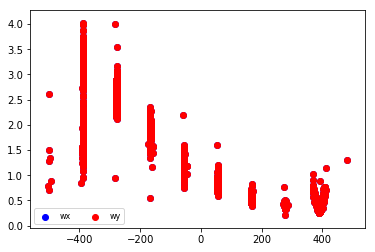

In [21]:
colors = ['b', 'r']

wx_plot = plt.scatter(z, ratio, marker='o', c=colors[0], edgecolors = 'face')
wy_plot = plt.scatter(z, w_y/w_x, marker='o', c=colors[1], edgecolors = 'face')

plt.legend((wx_plot, wy_plot),
           ('wx', 'wy'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.show()

In [13]:
import math

# x[0] : w_0
# x[1] : d
# x[2] : A
# x[3] : B
# x[4] : c
def fun(x, z, ww):
    return (x[0]**2)*(1 + ((z-x[4])/x[1])**2 + x[2]*((z-x[4])/x[1])**3 + x[3]*((z-x[4])/x[1])**4) - ww

In [37]:
from scipy.optimize import least_squares

x_res_robust = least_squares(fun, np.ones(5), args = (z, w_x**2))
y_res_robust = least_squares(fun, np.ones(5), args = (z, w_y**2))

In [38]:
def visaulize(z, model):
    print("w_0 : {}, c : {}, d : {}, A : {}, B : {}".format(model.x[0], model.x[4], model.x[1], model.x[2], model.x[3]))
    w = fun(model.x, z, 0)

    plt.figure(1)
    plt.scatter(z, np.sqrt(w))

w_0 : 296.682180569, c : -112.893310353, d : 168.464303039, A : 0.359569665712, B : -0.110754506843


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt


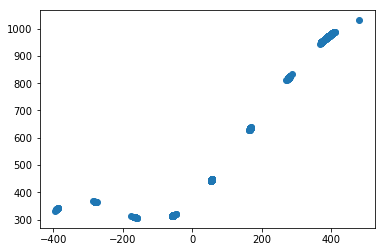

In [39]:
visaulize(z, x_res_robust)

plt.show()

w_0 : 286.651259694, c : 98.8297884135, d : 143.727959104, A : -0.27295894737, B : -0.0979220831859


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt


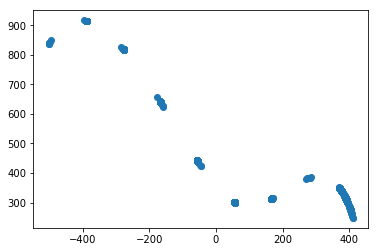

In [40]:
visaulize(z, y_res_robust)

plt.show()